In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#Dropping the nonsense rows at the beginning and specifying the column row
data = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls',
                    header=1, skiprows=[0,1,2,])

In [3]:
data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [104]:
#Only selecting columns needed for evaluation
data_short = data.iloc[:, [1,3,6]]

In [105]:
data_short.head()

,Population,Murder and nonnegligent manslaughter,Robbery
0,1861.000,0.000,0.000
1,2577.000,0.000,0.000
2,2846.000,0.000,0.000
3,97956.000,8.000,227.000
4,6388.000,0.000,4.000


In [106]:
#Adding Pop squared column
data_short['Population_sq'] = data_short.Population ** 2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [107]:
#Renaming columns, because of strange error
data_short.columns = ['Population', 'Murder','Robbery', 'Population_sq']

In [108]:
#Turning Murder continuous into categorical
data_short.Murder = (data_short.Murder > 0).astype(int)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [109]:
data_short.Murder.head()

0    0
1    0
2    0
3    1
4    0
Name: Murder, dtype: int64

In [110]:
#Turning Robbery continuous into categorical
data_short.Robbery = (data_short.Robbery > 0).astype(int)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [111]:
data_short.Robbery.head()

0    0
1    0
2    0
3    1
4    1
Name: Robbery, dtype: int64

In [112]:
#Checking if we have NaN values in the data set
data_check = data_short.apply(lambda x: np.isnan(x))

In [113]:
#Looks like we do for the two population variables
for item in data_check:
    display(data_check[item].value_counts())

False    348
True       3
Name: Population, dtype: int64

False    351
Name: Murder, dtype: int64

False    351
Name: Robbery, dtype: int64

False    348
True       3
Name: Population_sq, dtype: int64

In [114]:
#Removing the NaN
data_short = data_short.dropna()

In [115]:
#Checking that all the values are above zero
(data_short.Population > 0).astype(int).sum()

348

In [30]:
# Initiate and fit our model.
regr = linear_model.LinearRegression()
X = data_short['Robbery'].values.reshape(-1,1)
Y = data_short[['Population','Murder','Population_sq']]
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
#Results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[5.90626217e+04]
 [2.22470827e-01]
 [3.38861134e+11]]

Intercept: 
 [4.56611511e+03 7.19424460e-03 4.32229416e+07]

R-squared:
0.0019345087987814626


In [32]:
data.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [119]:
data_short['Property_crime'] = data['Property\ncrime']

In [120]:
data_short['Larceny_by_pop'] = data['Larceny-\ntheft']/data['Population']

In [121]:
#Try a new combination
Y2 = data_short[['Population','Population_sq','Property_crime', 'Murder','Larceny_by_pop']]
regr.fit(X,Y2)
#Results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y2))


Coefficients: 
 [[6.42105403e-01]
 [1.28421081e+00]
 [1.23867299e+03]
 [2.22470827e-01]
 [1.04719881e-02]]

Intercept: 
 [3.50394389e+00 7.00788777e+00 4.86906475e+01 7.19424460e-03
 9.52674037e-03]

R-squared:
0.0062912937153829784


(array([ 19.,  89., 100.,  75.,  51.,  10.,   3.,   0.,   0.,   1.]),
 array([ 5.44197149,  6.28259013,  7.12320877,  7.96382741,  8.80444605,
         9.64506469, 10.48568333, 11.32630197, 12.16692061, 13.00753925,
        13.84815789]),
 <a list of 10 Patch objects>)

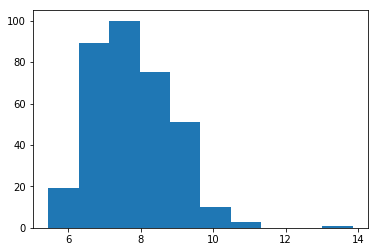

In [122]:
plt.hist(data_short['Population_sq'])

In [123]:
np.argmax(data_short['Population_sq'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


216

In [124]:
data_short = data_short.drop(index=216)

In [56]:
#Try a new combination
X2 = data_short['Robbery'].values.reshape(-1,1)
Y2 = data_short[['Population','Population_sq','Property_crime', 'Murder','Larceny_by_pop']]
regr.fit(X2,Y2)
#Results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X2, Y2))


Coefficients: 
 [[1.90025387e+04]
 [1.57254022e+09]
 [5.62309353e+02]
 [2.18767294e-01]
 [1.05006076e-02]]

Intercept: 
 [4.56611511e+03 4.32229416e+07 4.86906475e+01 7.19424460e-03
 9.52674037e-03]

R-squared:
0.023191799225444346


(array([ 8., 31., 59., 57., 71., 48., 44., 17.,  8.,  4.]),
 array([2.72098574, 2.99018175, 3.25937776, 3.52857376, 3.79776977,
        4.06696578, 4.33616179, 4.60535779, 4.8745538 , 5.14374981,
        5.41294581]),
 <a list of 10 Patch objects>)

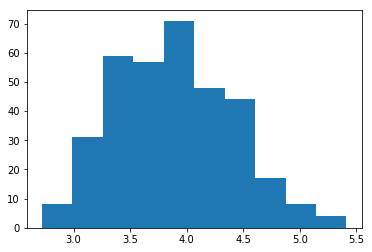

In [60]:
plt.hist(np.log10(data_short['Population']))

In [116]:
data_short.Population = np.log10(data_short['Population'])

(array([ 8., 31., 59., 57., 71., 48., 44., 17.,  8.,  4.]),
 array([ 5.44197149,  5.9803635 ,  6.51875552,  7.05714753,  7.59553954,
         8.13393156,  8.67232357,  9.21071558,  9.7491076 , 10.28749961,
        10.82589162]),
 <a list of 10 Patch objects>)

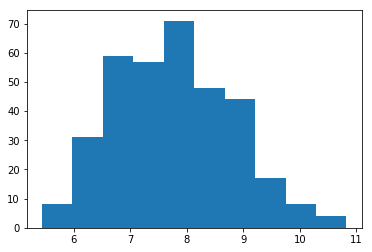

In [61]:
plt.hist(np.log10(data_short['Population_sq']))

In [117]:
data_short.Population_sq = np.log10(data_short['Population_sq'])

In [118]:
#Use logs instead of values for Pop/Pop_sq
X2 = data_short['Robbery'].values.reshape(-1,1)
Y2 = data_short[['Population','Population_sq', 'Murder']]
regr.fit(X2,Y2)
#Results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X2, Y2))


Coefficients: 
 [[0.6421054 ]
 [1.28421081]
 [0.22247083]]

Intercept: 
 [3.50394389 7.00788777 0.00719424]

R-squared:
0.3205819446254394


In [87]:
data_short.Property_crime = np.sqrt(data_short.Property_crime)

In [125]:
#Use logs instead of values for Pop/Pop_sq
X2 = data_short['Robbery'].values.reshape(-1,1)
Y2 = data_short[['Population','Population_sq', 'Murder']]
regr.fit(X2,Y2)
#Results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X2, Y2))


Coefficients: 
 [[0.62874949]
 [1.25749898]
 [0.21876729]]

Intercept: 
 [3.50394389 7.00788777 0.00719424]

R-squared:
0.33548830010604697
